# Install Libraries

In [ ]:
!pip install requests

In [ ]:
import requests

In [ ]:
import pandas as pd
import numpy as np

#Using Google API to get an address Long and Lat

In [ ]:
GOOGLE_API_KEY = '' 

def extract_lat_long_via_address(address_or_zipcode):
    lat, lng = None, None
    api_key = GOOGLE_API_KEY
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    endpoint = f"{base_url}?address={address_or_zipcode}&key={api_key}"
    # see how our endpoint includes our API key? Yes this is yet another reason to restrict the key
    r = requests.get(endpoint)
    if r.status_code not in range(200, 299):
        return None, None
    try:
        '''
        This try block incase any of our inputs are invalid. This is done instead
        of actually writing out handlers for all kinds of responses.
        '''
        results = r.json()['results'][0]
        lat = results['geometry']['location']['lat']
        lng = results['geometry']['location']['lng']
    except:
        pass
    return lat, lng

In [ ]:
extract_lat_long_via_address("5409 del rey drive Denton, TX 76208")

(33.173512, -97.0761271)

In [ ]:
df = pd.DataFrame({'lat': extract_lat_long_via_address("5409 del rey drive Denton, TX 76208")[0], 'long':  extract_lat_long_via_address("5409 del rey drive Denton, TX 76208")[1]}, index=[0])
df2 = pd.DataFrame({'lat': extract_lat_long_via_address("3939 Rosemeade Pky Dallas, Texas, 75007")[0], 'long':  extract_lat_long_via_address("3939 Rosemeade Pky Dallas, Texas, 75007")[1]}, index=[0])
df3 = pd.DataFrame({'lat': extract_lat_long_via_address("4015 Spring Ave Dallas, Texas, 75210")[0], 'long':  extract_lat_long_via_address("4015 Spring Ave Dallas, Texas, 75210")[1]}, index=[0])
df4 = pd.DataFrame({'lat': extract_lat_long_via_address("207 Swisher Rd Lake Dallas, Texas, 75065")[0], 'long':  extract_lat_long_via_address("207 Swisher Rd Lake Dallas, Texas, 75065")[1]}, index=[0])
df5 = pd.DataFrame({'lat': extract_lat_long_via_address("4209 Huckleberry Cir Dallas, Texas, 75216")[0], 'long':  extract_lat_long_via_address("4209 Huckleberry Cir Dallas, Texas, 75216")[1]}, index=[0])
df6 = pd.DataFrame({'lat': extract_lat_long_via_address("4312 Carpenter Ave Dallas, Texas, 75210")[0], 'long':  extract_lat_long_via_address("4312 Carpenter AveDallas, Texas, 75210")[1]}, index=[0])
df7 = pd.DataFrame({'lat': extract_lat_long_via_address("3235 Seevers Ave Dallas, Texas, 75216")[0], 'long':  extract_lat_long_via_address("3235 Seevers Ave Dallas, Texas, 75216")[1]}, index=[0])
df8 = pd.DataFrame({'lat': extract_lat_long_via_address("330 E Camp Wisdom Rd Dallas, Texas, 75241")[0], 'long':  extract_lat_long_via_address("330 E Camp Wisdom RdDallas, Texas, 75241")[1]}, index=[0])
df9 = pd.DataFrame({'lat': extract_lat_long_via_address("3446 Binkley Ave Dallas, Texas, 75205")[0], 'long':  extract_lat_long_via_address("3446 Binkley Ave Dallas, Texas, 75205")[1]}, index=[0])
df10 = pd.DataFrame({'lat': extract_lat_long_via_address("106 Briergate Ln Lake Dallas, Texas, 75065")[0], 'long':  extract_lat_long_via_address("106 Briergate Ln Lake Dallas, Texas, 75065")[1]}, index=[0])
df11 = pd.DataFrame({'lat': extract_lat_long_via_address("114 Lake Vista Dr Lake Dallas, Texas, 75065")[0], 'long':  extract_lat_long_via_address("114 Lake Vista Dr Lake Dallas, Texas, 75065")[1]}, index=[0])
df12 = pd.DataFrame({'lat': extract_lat_long_via_address("1001 Ross Ave Dallas, Texas, 75202")[0], 'long':  extract_lat_long_via_address("1001 Ross Ave Dallas, Texas, 75202")[1]}, index=[0])
df13 = pd.DataFrame({'lat': extract_lat_long_via_address("1234 Adelaide Dr Dallas, Texas, 75216")[0], 'long':  extract_lat_long_via_address("1234 Adelaide Dr Dallas, Texas, 75216")[1]}, index=[0])
df14 = pd.DataFrame({'lat': extract_lat_long_via_address("1636 Meadow Valley Ln Dallas, Texas, 75232")[0], 'long':  extract_lat_long_via_address("1636 Meadow Valley Ln Dallas, Texas, 75232")[1]}, index=[0])



#Create Dataframe with Long and Lat from different addresses

In [ ]:
frames = [df, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14]

result = pd.concat(frames)

In [ ]:
print(result)

         lat       long
0  33.173512 -97.076127
0  33.011212 -96.844805
0  32.770935 -96.746969
0  33.131061 -97.028321
0  32.692574 -96.822345
0  32.770092 -96.741940
0  32.704665 -96.822058
0  32.659085 -96.817348
0  32.841009 -96.789178
0  33.123488 -97.041884
0  33.134590 -97.029714
0  32.782624 -96.804707
0  32.685558 -96.805364
0  32.673786 -96.847894


In [ ]:
features = result[['lat', 'long']]
print(features)

         lat       long
0  33.173512 -97.076127
0  33.011212 -96.844805
0  32.770935 -96.746969
0  33.131061 -97.028321
0  32.692574 -96.822345
0  32.770092 -96.741940
0  32.704665 -96.822058
0  32.659085 -96.817348
0  32.841009 -96.789178
0  33.123488 -97.041884
0  33.134590 -97.029714
0  32.782624 -96.804707
0  32.685558 -96.805364
0  32.673786 -96.847894


#Create Clustering Algorithm

In [ ]:
import sklearn

from sklearn.cluster import KMeans

In [ ]:
# create kmeans model/object
kmeans = KMeans(
    init="random",
    n_clusters=round((len(result) / 5)),
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
# do clustering
kmeans.fit(features)
# save results
labels = kmeans.labels_

In [ ]:
# send back into dataframe and display it
result['cluster'] = labels
# display the number of mamber each clustering
_clusters = result.groupby('cluster').count()
print(_clusters)

         lat  long
cluster           
0          4     4
1          5     5
2          5     5


In [ ]:
print(result)

         lat       long  cluster
0  33.173512 -97.076127        0
0  33.011212 -96.844805        1
0  32.770935 -96.746969        1
0  33.131061 -97.028321        0
0  32.692574 -96.822345        2
0  32.770092 -96.741940        1
0  32.704665 -96.822058        2
0  32.659085 -96.817348        2
0  32.841009 -96.789178        1
0  33.123488 -97.041884        0
0  33.134590 -97.029714        0
0  32.782624 -96.804707        1
0  32.685558 -96.805364        2
0  32.673786 -96.847894        2


#Plot the Points on a Graph

In [ ]:
import matplotlib.pyplot as plt

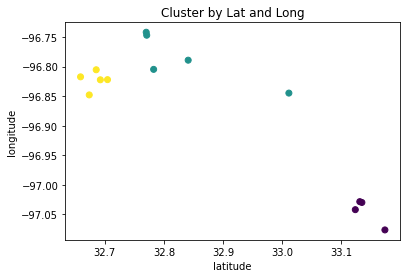

In [ ]:
x = np.array(result['lat'])
y = np.array(result['long'])

plt.scatter(x, y,c=result['cluster'])
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("Cluster by Lat and Long")
plt.show()